In [10]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
      --------------------------------------- 0.0/3.0 MB 1.9 MB/s eta 0:00:02
     - -------------------------------------- 0.1/3.0 MB 1.5 MB/s eta 0:00:02
     --- ------------------------------------ 0.3/3.0 MB 2.3 MB/s eta 0:00:02
     ------ --------------------------------- 0.5/3.0 MB 3.0 MB/s eta 0:00:01
     -------- ------------------------------- 0.6/3.0 MB 3.1 MB/s eta 0:00:01
     ----------- ---------------------------- 0.8/3.0 MB 3.3 MB/s eta 0:00:01
     ------------- -------------------------- 1.0/3.0 MB 3.4 MB/s eta 0:00:01
     --------------- ------------------------ 1.1/3.0 MB 3.3 MB/s eta 0:00:01
     ------------------ --------------------- 1.3/3.0 MB 3.4 MB/s eta 0:00:01
     -------------------- ------------------- 1.5/3.0 MB 3.5 MB/s eta 0:00:01
     ---------------------- ----------------- 1.7/3.0 MB 3.6 MB/s eta 0:00:01
     ------------------------ --------------- 1.8/3.0 MB 3.6 MB/s eta 0


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install openpyxl

   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.9 kB ? eta -:--:--
   --------- ----------------------------- 61.4/250.9 kB 825.8 kB/s eta 0:00:01
   -------------------------- ------------- 163.8/250.9 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------  245.8/250.9 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 250.9/250.9 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import yfinance as yf
import pandas as pd

# Download gold price and USD/AUD data for the specified week
start_date = pd.to_datetime("2024-08-1")
end_date = pd.to_datetime("2024-09-23")

gold_data = yf.download("^GSPC", start=start_date, end=end_date)["Close"]  # Assuming GSPC represents gold price
usd_aud_data = yf.download("AUDUSD=X", start=start_date, end=end_date)["Close"]

# Combine data into a DataFrame
data = pd.DataFrame({"Gold Price": gold_data, "USD/AUD": usd_aud_data})

# Create and save the Excel sheet
data.to_excel("gold_usd_aud_prices.xlsx", index=True)

print("Excel sheet created successfully!")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Excel sheet created successfully!


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [40]:
data = pd.read_excel('gold_usd_aud_prices.xlsx')
print(data.head())
print(data.isnull().sum())

        Date   Gold_Price   AUD_USD
0 2024-08-01  5446.680176  0.654700
1 2024-08-02  5346.560059  0.649490
2 2024-08-05  5186.330078  0.649722
3 2024-08-06  5240.029785  0.651550
4 2024-08-07  5199.500000  0.651500
Date          0
Gold_Price    1
AUD_USD       0
dtype: int64


In [45]:
# Drop any rows with missing values (if any)
data = data.dropna()

# Convert Date to datetime if required
data['Date'] = pd.to_datetime(data['Date'])

# Set Date as the index (Optional, helps with time series data)
data.set_index('Date', inplace=True)

# Inspect the cleaned data
print(data.head())


             Gold_Price   AUD_USD
Date                             
2024-08-01  5446.680176  0.654700
2024-08-02  5346.560059  0.649490
2024-08-05  5186.330078  0.649722
2024-08-06  5240.029785  0.651550
2024-08-07  5199.500000  0.651500


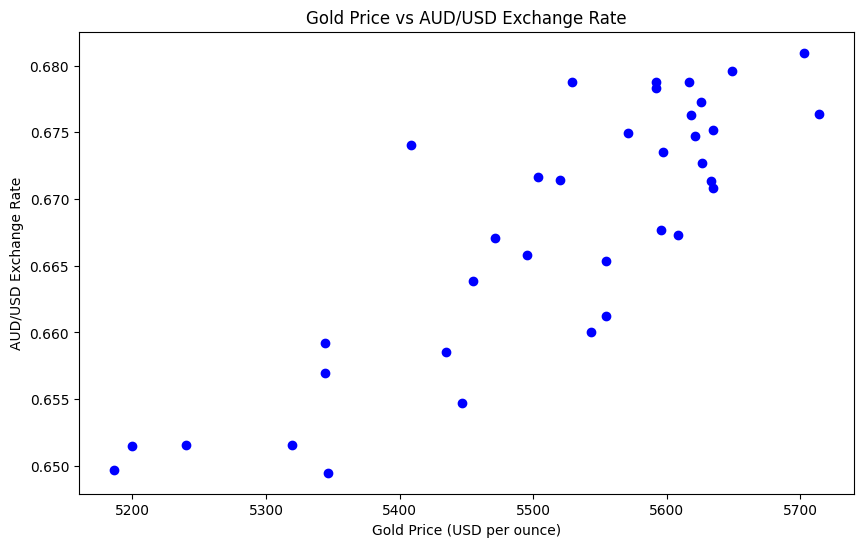

Correlation coefficient: 0.8478770948494136


In [46]:
# Plot the relationship between Gold Price and AUD/USD exchange rate
plt.figure(figsize=(10, 6))
plt.scatter(data['Gold_Price'], data['AUD_USD'], color='blue')
plt.title('Gold Price vs AUD/USD Exchange Rate')
plt.xlabel('Gold Price (USD per ounce)')
plt.ylabel('AUD/USD Exchange Rate')
plt.show()

# Calculate and print correlation coefficient
correlation = np.corrcoef(data['Gold_Price'], data['AUD_USD'])
print(f'Correlation coefficient: {correlation[0, 1]}')


In [47]:
# Define independent variable (Gold Price) and dependent variable (AUD/USD exchange rate)
X = data['Gold_Price'].values.reshape(-1, 1)  # Independent variable (Gold Prices)
y = data['AUD_USD'].values  # Dependent variable (AUD/USD)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


The linear equation that models the relationship is:

AUD/USD=(slope×Gold Price)+intercept




In [48]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Obtain the slope and intercept of the linear model
slope = model.coef_
intercept = model.intercept_

print(f"Slope: {slope[0]}")
print(f"Intercept: {intercept}")


Slope: 6.176370896204461e-05
Intercept: 0.3273741285747992


In [53]:
# Make predictions on the test set
y_pred = model.predict(X_train)


In [57]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_train, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared
r2 = r2_score(y_train, y_pred)
print(f'R-squared: {r2}')


Mean Squared Error: 3.0275084289661257e-05
R-squared: 0.7064880134941559


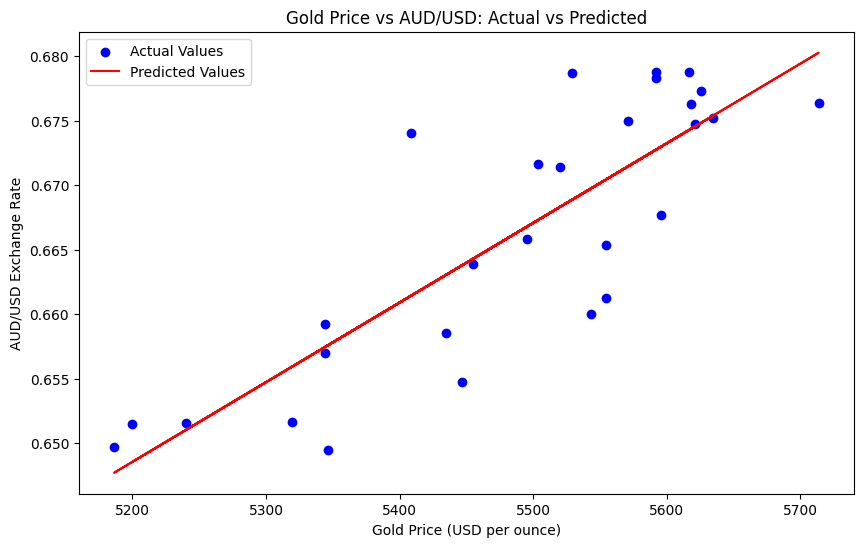

In [58]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Actual Values')
plt.plot(X_train, y_pred, color='red', label='Predicted Values')
plt.title('Gold Price vs AUD/USD: Actual vs Predicted')
plt.xlabel('Gold Price (USD per ounce)')
plt.ylabel('AUD/USD Exchange Rate')
plt.legend()
plt.show()


Explanation of the Code

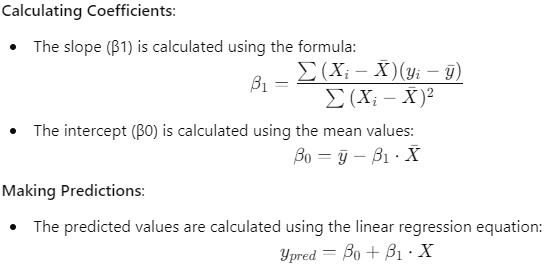

Slope (β1): 5.998022065255951e-05
Intercept (β0): 0.33692749089224316
Mean Squared Error: 2.6162140582858954e-05
R-squared: 0.7188955679702826


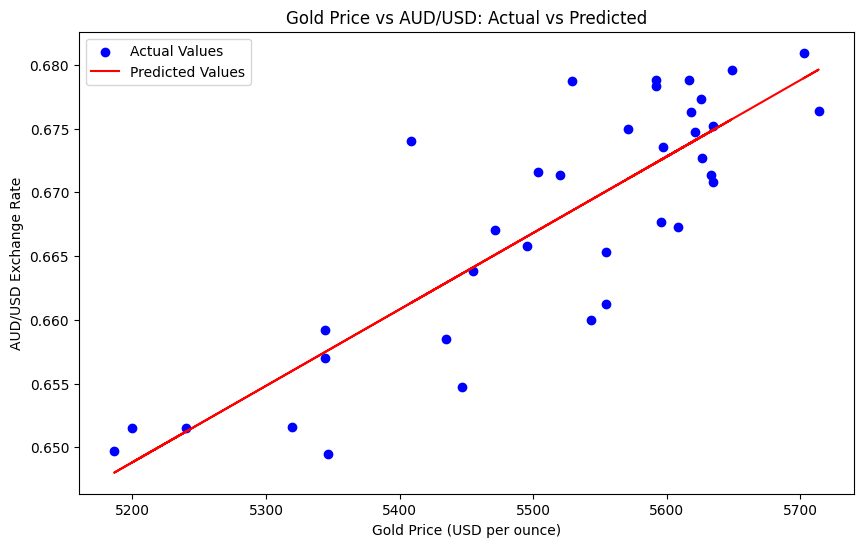

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = pd.read_excel('gold_usd_aud_prices.xlsx')

# Step 2: Data Preprocessing
# Drop any missing values
data = data.dropna()

# Convert Date to datetime and set as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Prepare independent (X) and dependent (y) variables
X = data['Gold_Price'].values
y = data['AUD_USD'].values

# Step 3: Manual Calculation of Linear Regression Coefficients
# Number of observations
n = len(X)

# Calculate means
X_mean = np.mean(X)
y_mean = np.mean(y)

# Calculate the slope (β1)
numerator = np.sum((X - X_mean) * (y - y_mean))
denominator = np.sum((X - X_mean) ** 2)
slope = numerator / denominator

# Calculate the intercept (β0)
intercept = y_mean - (slope * X_mean)

print(f"Slope (β1): {slope}")
print(f"Intercept (β0): {intercept}")

# Step 4: Make Predictions
y_pred = intercept + slope * X

# Step 5: Evaluate the Model
# Calculate Mean Squared Error (MSE)
mse = np.mean((y - y_pred) ** 2)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared
ss_total = np.sum((y - y_mean) ** 2)
ss_residual = np.sum((y - y_pred) ** 2)
r_squared = 1 - (ss_residual / ss_total)
print(f'R-squared: {r_squared}')

# Step 6: Visualize Results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Values')
plt.plot(X, y_pred, color='red', label='Predicted Values')
plt.title('Gold Price vs AUD/USD: Actual vs Predicted')
plt.xlabel('Gold Price (USD per ounce)')
plt.ylabel('AUD/USD Exchange Rate')
plt.legend()
plt.show()
